# Exercise: Wind systems
Fabian Schmid | Institut für Energietechnik | FG EVUR | Berlin

## Content:
- Wind ressources
- Wind turbine power output calculation 
- Energy yield and capacity factor
- Transfer jupyter notebook into spyder file

## Wind ressources
### Load weather data
pandas.read_csv() is used to load csv weather file

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

**TASK:** 
- Use the provided csv file to load weather data of Greifswald   
- Adapt pressure unit from hPa to Pa
- Save wind speed in own variable called *wind_speed_10m*

In [12]:
# Load libaries
import pandas as pd

# Load wind/weather data
weather_data = pd.read_csv('weather_greifswald.csv', comment='#', header=0, decimal='.', sep=';')

# Adaption of pressure unit hPa to Pa
weather_data['Pressure'] = weather_data['Pressure']*100

# Wind speed at 10 m above ground
wind_speed_10m = weather_data['Wind speed']


In [18]:
weather_data

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,01.01.2019,01:00,279.59,89.89,101825.0,10.45,257.71,0.064382,0.000000,0.0,0.0
1,01.01.2019,02:00,279.39,90.32,101701.0,10.77,256.06,0.040652,0.000000,0.0,0.0
2,01.01.2019,03:00,279.39,90.51,101529.0,11.19,252.36,0.047058,0.000000,0.0,0.0
3,01.01.2019,04:00,279.52,90.47,101343.0,11.99,249.64,0.099143,0.000000,0.0,0.0
4,01.01.2019,05:00,279.66,90.16,101173.0,12.83,251.05,0.173813,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,31.12.2019,20:00,275.64,99.54,102877.0,5.79,294.42,0.001483,0.000000,0.0,0.0
8756,31.12.2019,21:00,275.47,100.08,102923.0,5.66,290.76,0.003721,0.000000,0.0,0.0
8757,31.12.2019,22:00,275.53,99.34,102951.0,5.67,288.40,0.004053,0.000000,0.0,0.0
8758,31.12.2019,23:00,275.56,98.49,102953.0,5.47,285.15,0.007015,0.000000,0.0,0.0


- Enercon E-82/2000 with 98m hub height, main parameters:
    - turbine_nominal_power = 2 050 000 W
    - turbine_hub_height: 98 m
    - turbine_rotor_diameter: 82 m
    - power_curve with power values (Attension are given in KW in oedp database) and wind speed values.
        - [0.0, 3.0, 25.0, 82.0, 174.0, 321.0, 532.0, 815.0, 1180.0, 1580.0, 1810.0, 1980.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0]
        - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]

**TASK:**
- Define turbine nominal power, hub height and rotor diameter

## Wind turbine power output calculation 
- Definition of wind turbine main parameters
- Wind speed, temperature and density at hub height
- Wind turbine power output

### Definition of wind turbine main parameters
- Based on oedp wind turbine database
    - oedp wind turbine database
        - Function windpowerlib.data.store_turbine_data_from_oedb() pulls all data from oedp database and saves it to csv
            - https://windpowerlib.readthedocs.io/en/stable/temp/windpowerlib.data.store_turbine_data_from_oedb.html#windpowerlib-data-store-turbine-data-from-oedb
        
- Another possibility is to extract the data from datasheets! 

In [15]:
# Import libaries
import windpowerlib
from windpowerlib import data as wt
import numpy as np

# Define wind turbine main parameters
turbine_nominal_power = 2050000
turbine_hub_height = 98
turbine_rotor_diameter = 82

# Power curve - Convert unit of power values kW into W
turbine_power_curve_values = np.array([0.0, 3.0, 25.0, 82.0, 174.0, 321.0, 532.0, 815.0, 1180.0, 1580.0, 1810.0, 1980.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0, 2050.0])*1000
turbine_power_curve_wind_speeds = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0])

### Wind speed, temperature and density at hub height
Pvlib models exist for definition of wind speed, temperature and density at hub height, which are all needed for turbine power calculation.

- Wind speed at hub height - assume logarithmic profile
    - windpowerlib.wind_speed.logarithmic_profile()
    - https://windpowerlib.readthedocs.io/en/stable/temp/windpowerlib.wind_speed.logarithmic_profile.html
    - Assume a roughness_length of 0.02
    
**TASK**
- Add the missing parameter and calculate the wind speed at hub height

In [17]:
# Define roughness_length of location
roughness_length = 0.02

# Wind speed model 'logarithmic'
wind_speed_hub_height = windpowerlib.wind_speed.logarithmic_profile(wind_speed=wind_speed_10m, 
                                                                    wind_speed_height=10,
                                                                    hub_height=turbine_hub_height, 
                                                                    roughness_length=0.02, 
                                                                    obstacle_height=0)
wind_speed_hub_height


0       14.287876
1       14.725400
2       15.299649
3       16.393458
4       17.541957
          ...    
8755     7.916440
8756     7.738697
8757     7.752369
8758     7.478917
8759     7.902768
Name: Wind speed, Length: 8760, dtype: float64

- Temperature at hub height - assume linear gradient
    - windpowerlib.temperature.linear_gradient()
    - https://windpowerlib.readthedocs.io/en/stable/temp/windpowerlib.temperature.linear_gradient.html
    
    
**TASK**
- Add the missing parameter and calculate the temperature at hub height

In [19]:
# Temperature model 'linear_gradient'
temperature_hub_height = windpowerlib.temperature.linear_gradient(temperature=weather_data['Temperature'],
                                                                  temperature_height=2, 
                                                                  hub_height=turbine_hub_height)
temperature_hub_height

0       278.966
1       278.766
2       278.766
3       278.896
4       279.036
         ...   
8755    275.016
8756    274.846
8757    274.906
8758    274.936
8759    274.986
Name: Temperature, Length: 8760, dtype: float64

- Density at hub height - assume ideal gas
    - windpowerlib.density.ideal_gas()
    - https://windpowerlib.readthedocs.io/en/stable/temp/windpowerlib.density.ideal_gas.html
    
    
**TASK**
- Add the missing parameter and calculate the density at hub height using the ideal gas assumption
    

In [20]:
# Density model 'ideal_gas'
density_hub_height = windpowerlib.density.ideal_gas(pressure=weather_data['Pressure'], 
                                                    pressure_height=0, 
                                                    hub_height=turbine_hub_height, 
                                                    temperature_hub_height=temperature_hub_height)
density_hub_height

0       1.256253
1       1.255605
2       1.253455
3       1.250548
4       1.247798
          ...   
8755    1.287622
8756    1.289001
8757    1.289075
8758    1.288959
8759    1.288560
Length: 8760, dtype: float64

### Wind turbine power output

- Turbine output power - with power curve . using the initialized WindTurbine object
    - windpowerlib.power_output.power_curve()
    - https://windpowerlib.readthedocs.io/en/stable/temp/windpowerlib.power_output.power_curve.html#windpowerlib.power_output.power_curve

- Add to pandas series Date Time Index
    - pandas.date_range()
    - pandas.Series()
    
    
        
**TASK**
- Add the missing parameter and calculate the windturbine output power
- Add a datetimeindex to the result pandas.Series

<AxesSubplot:>

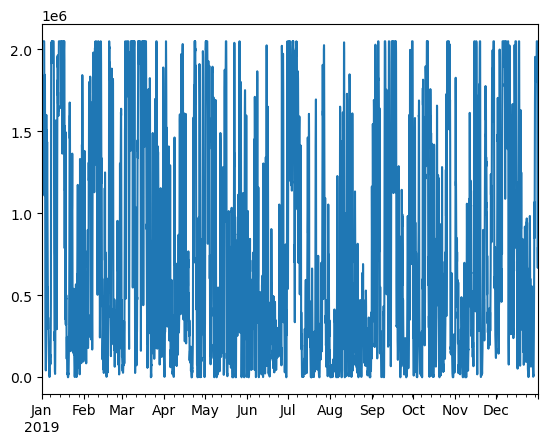

In [21]:
# Power output model ' power_coefficient_curve'
windturbine_power_output = windpowerlib.power_output.power_curve(wind_speed=wind_speed_hub_height, 
                                                                 power_curve_wind_speeds=turbine_power_curve_wind_speeds, 
                                                                 power_curve_values=turbine_power_curve_values, 
                                                                 density=density_hub_height)
# Add to pandas series datetimeindex
# Define timeindex
timeindex = pd.date_range(start='2019-01-01',
                          end='2020-01-01',
                          closed='left',
                          freq='H')

windturbine_power_output = pd.Series(windturbine_power_output.values,
                                     index=timeindex)

windturbine_power_output.plot()

## Wind energy yield and capacity factor
- Wind energy yield
    - daily
    - monthly
    - annual
- Use pandas functionality pandas.series.resample()
    - https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html
    
    
**TASK**
- Calculate the daily, monthly and annual energy yield

<AxesSubplot:>

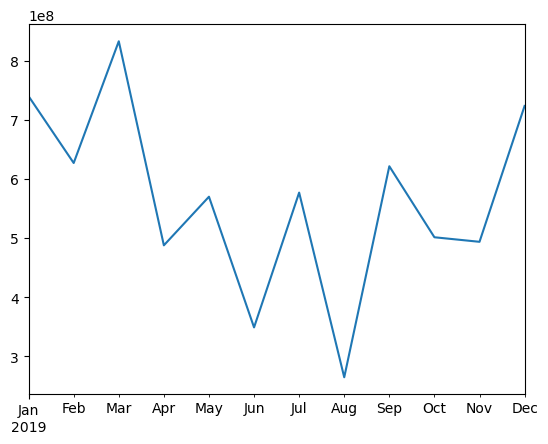

In [22]:
# Calculate daily, monthly, annual energy yield
windturbine_energy_output_d = windturbine_power_output.resample('D').sum()
windturbine_energy_output_m = windturbine_power_output.resample('M').sum()
windturbine_energy_output_y = windturbine_power_output.resample('Y').sum()

windturbine_energy_output_m.plot()

- Plot daily and monthly energy yield in one figure
    - Use matplotlib.axes.Axes.twinx()
        - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html#matplotlib-axes-axes-twinx
    - Bar plot for monthly yield
        - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html

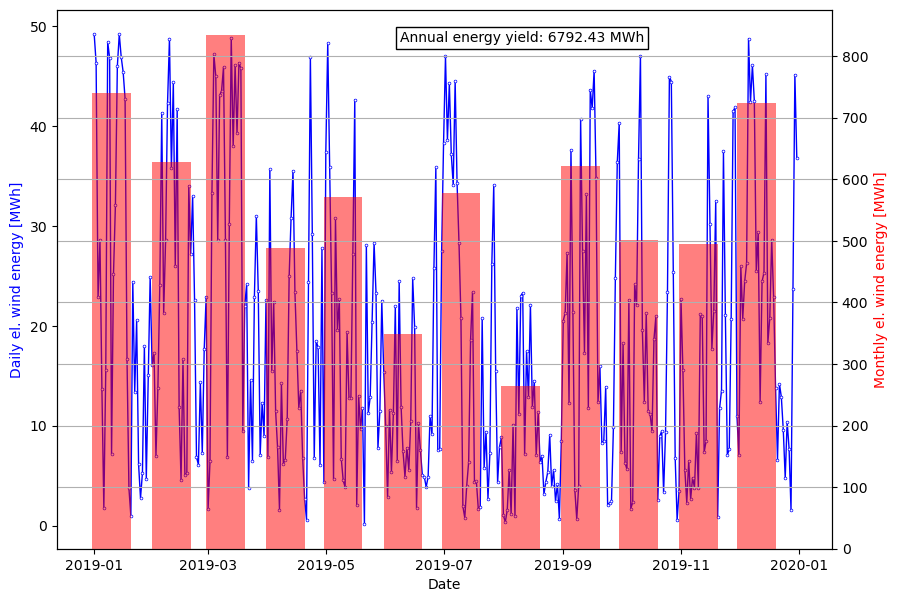

In [24]:
# Import libaries
import matplotlib.pyplot as plt
import numpy as np

## Power output of windturbine
fig, ax1  = plt.subplots(figsize=(10,7))
color1 = 'blue'
ax1.plot(windturbine_energy_output_d.index, windturbine_energy_output_d.values/1e6, 
         marker='o', markersize=2, markeredgewidth=0.5, markerfacecolor='white', 
         markeredgecolor=color1, linewidth=1., color=color1)

ax1.set_ylabel('Daily el. wind energy [MWh]', color=color1)
ax1.set_xlabel('Date')

ax2 = ax1.twinx()
color2 = 'red'
ax2.bar(x=windturbine_energy_output_m.index.shift(-1, freq='M'), 
        height=windturbine_energy_output_m.values/1000000,
        color=color2, width=20, alpha=0.5,
        align='edge')

ax2.set_ylabel('Monthly el. wind energy [MWh]', color=color2)


# Annotate annual energy yield
s='Annual energy yield: '+str(np.round(windturbine_energy_output_y.values[0]/1e6,2))+' MWh'
ax2.annotate(s,
             xy=(0.4,0.8), xycoords='figure fraction',
             bbox=dict(boxstyle='Square', fc='white'))

plt.grid()
plt.show()

fig.savefig('wind_energy_yield.tif', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches='tight', bbox_extra_artists=[], pad_inches=0.1)

**TASK**
- Calculate the daily, monthly and annual capacity factors using the power output timeseries you created above
- Plot the capacity factor
    - left yaxis: hourly data
    - right: monthly data


In [31]:
windturbine_capacity_factor = windturbine_power_output/turbine_nominal_power
windturbine_capacity_factor_d = windturbine_capacity_factor.resample('D').mean()
windturbine_capacity_factor_m = windturbine_capacity_factor.resample('M').mean()
windturbine_capacity_factor_y = windturbine_capacity_factor.resample('Y').mean()


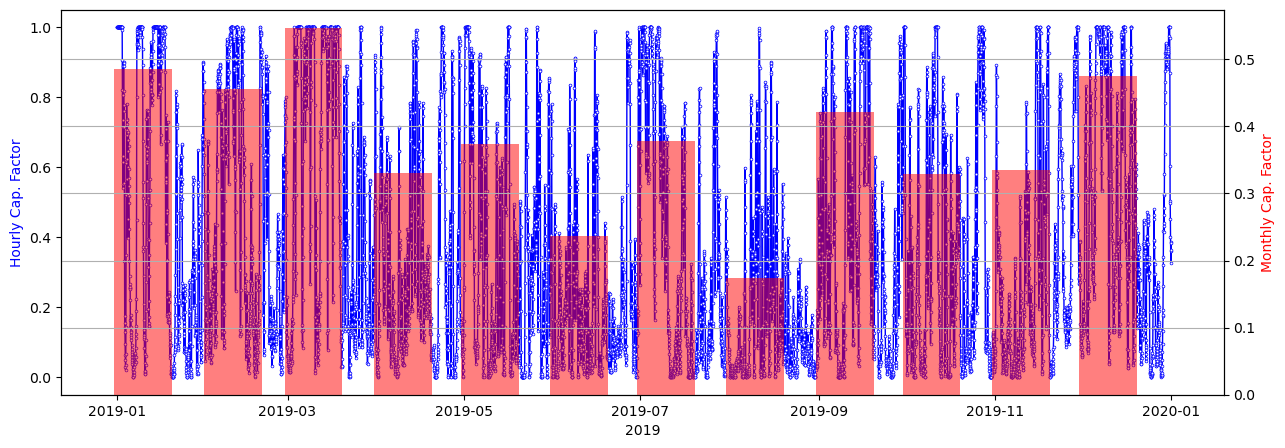

In [52]:
## Capacity factor of windturbine
fig, ax1  = plt.subplots(figsize=(15,5))
color1 = 'blue'
ax1.plot(windturbine_capacity_factor.index, windturbine_capacity_factor,
         marker='o', markersize=2, markeredgewidth=0.5, markerfacecolor='white', 
         markeredgecolor=color1, linewidth=1., color=color1)

ax1.set_ylabel('Hourly Cap. Factor', color=color1)
ax1.set_xlabel('2019')

ax2 = ax1.twinx()
color2 = 'red'
ax2.bar(x=windturbine_capacity_factor_m.index.shift(-1, freq='M'), 
        height=windturbine_capacity_factor_m,
        color=color2, width=20, alpha=0.5,
        align='edge')

ax2.set_ylabel('Monthly Cap. Factor', color=color2)

plt.grid()
plt.show()

## Transfer jupyter notebook into spyder file

- Spyder IDL has the advantage of having a variable explorer and better grafical interface for system analysis
- Go to *file* - *Download as* and download is as *Python file* with the py extension.
- Open this file in the Spyder IDE.